In [ ]:
# Sales Prediction Projet with Python

In [1]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# loading the dataset 
df = pd.read_csv("Sales.csv", encoding='latin1')
df.head()

In [2]:
# checking the data overview
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
# check for missing values
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
# describing the dataset
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


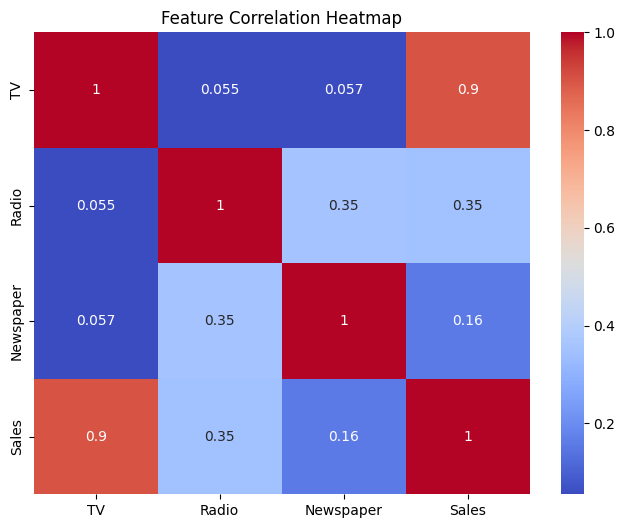

In [5]:
# building the co-relation matrix and visualize through heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
# split the data for training and testing
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [8]:
# 📏 Model Evaluation
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

def evaluate(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2 Score": r2_score(y_true, y_pred)
    }

print("Linear Regression Evaluation:", evaluate(y_test, lr_preds))
print("Random Forest Evaluation:", evaluate(y_test, rf_preds))


Linear Regression Evaluation: {'MAE': 1.2748262109549338, 'RMSE': 1.7052146229349223, 'R2 Score': 0.9059011844150826}
Random Forest Evaluation: {'MAE': 0.9179999999999993, 'RMSE': 1.1989298770153327, 'R2 Score': 0.9534827934927883}


In [9]:
# Conclusion

# - Random Forest model performs better than Linear Regression across all metrics.
# - You can improve further by hyperparameter tuning or using advanced ensemble methods.


In [13]:
new_data_with_rf_model = pd.DataFrame({
    'TV': [200],
    'Radio': [25],
    'Newspaper': [30]
})
predicted_sales_with_rf = rf_model.predict(new_data)
print(f"Predicted Sales: {predicted_sales_with_rf[0]:.2f}")


Predicted Sales: 17.25


In [14]:
new_data_with_lr_model = pd.DataFrame({
    'TV': [200],
    'Radio': [25],
    'Newspaper': [30]
})
predicted_sales_with_lr = rf_model.predict(new_data_with_lr_model)
print(f"Predicted Sales: {predicted_sales_with_lr[0]:.2f}")

Predicted Sales: 17.25
